# Geomar Muñoz - Student number: 2014222
# Master in Data Analytics - CCT College Dublin, Ireland
## Capstone Thesis September 2024
## Github account
## https://github.com/CCT-Dublin/msc-data-analytics-capstone-thesis-july-2024-2014222-student-cct-ie/tree/main

## Data Cleaning and Preprocessing:

### V2- Feedforward Neural Network (FNN)

In [4]:
# Utilise Python programming language in order to comply with the requisites of the assessment and perform adequate Machine
# Learning algorithms to discover and deliver insights.

# Import the necessary libraries (Numpy and Pandas) in order to perform data cleansing.
# These are the libraries that are conventionally used as a common practice in order to
# perform mathematical and statistical operations during a data analysis process

import numpy as np
import pandas as pd

import os

import re
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import tensorflow as tf
from tensorflow.keras import layers, models

import plotly.express as px
import plotly.io as pio

## Combine CSV Files

In [6]:
# List of CSV files

csv_files = [
    '07-dataset_2011_language_counts_categorized.csv',
    '07-dataset_2012_language_counts_categorized.csv',
    '07-dataset_2013_language_counts_categorized.csv',
    '07-dataset_2014_language_counts_categorized.csv',
    '07-dataset_2015_language_counts_categorized.csv',
    '07-dataset_2016_language_counts_categorized.csv',
    '08-dataset_2017_language_counts_categorized.csv',
    '08-dataset_2018_language_counts_categorized.csv',
    '08-dataset_2019_language_counts_categorized.csv',
    '08-dataset_2020_language_counts_categorized.csv',
    '08-dataset_2021_language_counts_categorized.csv',
    '08-dataset_2022_language_counts_categorized.csv',
    '08-dataset_2023_language_counts_categorized.csv'    
]

# Initialize an empty list to hold dataframes

dataframes = []

# Loop through the list of files and read each into a dataframe

for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Concatenate all the dataframes in the list

combined_df = pd.concat(dataframes, ignore_index=True)

# Optional: Save the combined dataframe to a new CSV file

# combined_df.to_csv('combined_data_2011_2022.csv', index=False)

# Optional: Save the combined dataframe to a new CSV file

combined_df.to_csv('all_combined_data_2011_2023.csv', index=False)

# Optional: Save the combined dataframe to a new CSV file

print("Combined CSV file saved as 'all_combined_data_2011_2023.csv'")

Combined CSV file saved as 'all_combined_data_2011_2023.csv'


# Step 2: Reading Dataset

In [8]:
# Read the CSV file by applying the pd.read_csv() function.

feedforward_Neural_Network = pd.read_csv('all_combined_data_2011_2023.csv')

In [9]:
# Print the feedforward_Neural_Network table dataframe

feedforward_Neural_Network

,Year,Language,Count,Category
0,2011,SQL,1615,Scripting Language
1,2011,JavaScript,1421,Programming Language
2,2011,CSS,1357,Markup Language
3,2011,C#,1353,Programming Language
4,2011,Java,911,Programming Language
...,...,...,...,...
3954,2023,ELFspy,39,Tools
3955,2023,snitch,39,Tools
3956,2023,lest,37,Tools
3957,2023,CUTE,36,Tools


In [10]:
# Print the last 5 rows of the tweets dataframe by applying the .tail() method,
# Will display the last 5 observations of the dataset

feedforward_Neural_Network.head()

,Year,Language,Count,Category
0,2011,SQL,1615,Scripting Language
1,2011,JavaScript,1421,Programming Language
2,2011,CSS,1357,Markup Language
3,2011,C#,1353,Programming Language
4,2011,Java,911,Programming Language


In [11]:
# Print the last 5 rows of the tweets dataframe by applying the .tail() method,
# Will display the last 5 observations of the dataset

feedforward_Neural_Network.tail()

,Year,Language,Count,Category
3954,2023,ELFspy,39,Tools
3955,2023,snitch,39,Tools
3956,2023,lest,37,Tools
3957,2023,CUTE,36,Tools
3958,2023,liblittletest,31,Tools


In [12]:
# Print the dimensions of the tweets_dataset DataFrame.

feedforward_Neural_Network.shape

(3959, 4)

In [13]:
# Check the information again to see how many entries remain

feedforward_Neural_Network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959 entries, 0 to 3958
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      3959 non-null   int64 
 1   Language  3957 non-null   object
 2   Count     3959 non-null   int64 
 3   Category  3959 non-null   object
dtypes: int64(2), object(2)
memory usage: 123.8+ KB


In [14]:
# Identifying missing values by applying the .isna().sum() methods,
# I am using this to get the number of missing records in each column

feedforward_Neural_Network.isnull().sum()

Year        0
Language    2
Count       0
Category    0
dtype: int64

In [15]:
# Display the columns

feedforward_Neural_Network.columns.tolist()

['Year', 'Language', 'Count', 'Category']

### Categories

#### 1- Programming.
#### 2- Scripting.
#### 3- Markup Languages.
#### 4- Web Frameworks.
#### 5- Databases.
#### 6- Platforms.
#### 7- Frameworks.
#### 8- Libraries.
#### 9- Tools.
#### 10- Other.

# Training the model: Feedforward Neural Network (FNN)

## Data Preparation & Model Training

/Users/geomarmunoz/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Mean Absolute Error (MAE): 804.46

Top 10 Predicted vs Actual Languages for 2023:
JavaScript: Predicted: 29331.09, Actual: 27667.00
SQL: Predicted: 21977.87, Actual: 22486.00
HTML/CSS: Predicted: 17713.58, Actual: 22734.00
Python: Predicted: 16251.64, Actual: 19322.00
C#: Predicted: 14265.40, Actual: 14600.00
Java: Predicted: 12535.19, Actual: 13578.00
TypeScript: Predicted: 12144.46, Actual: 19367.00
Bash/Shell: Predicted: 10709.34, Actual: 0.00
PHP: Predicted: 9504.17, Actual: 7782.00
C++: Predicted: 7963.71, Actual: 7884.00

Top 30 Languages: Actual vs Predicted for 2023:
+------------------------+--------------------+-----------------------+--------------+-----------+
| Language               |   Actual Data 2023 |   Predicted Data 2023 |   Difference | % Error   |
+========================+====================+=======================+==============+===========+
| JavaScript             |           27667.00 |              29331.09 |     -1664.0

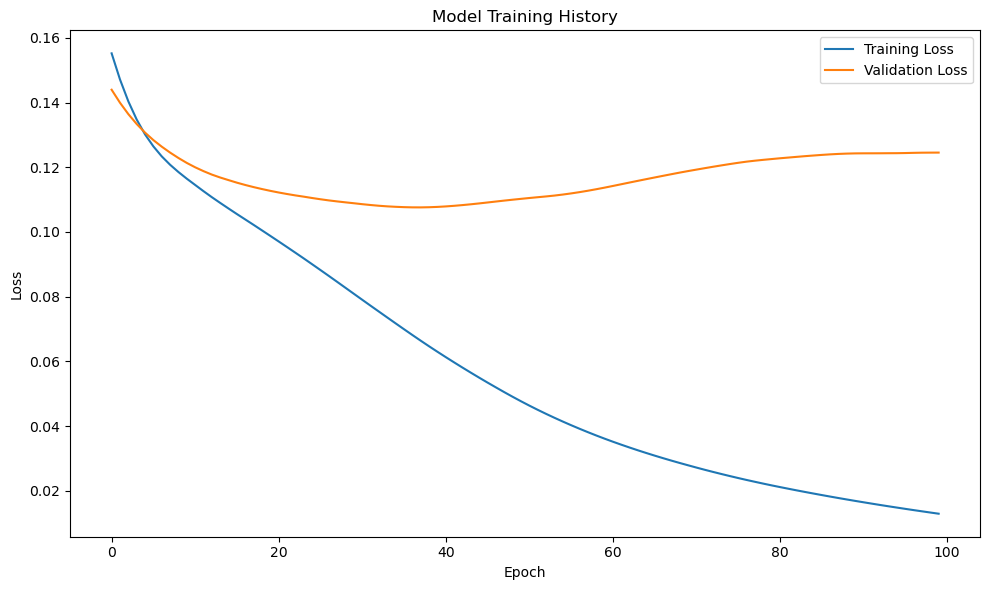

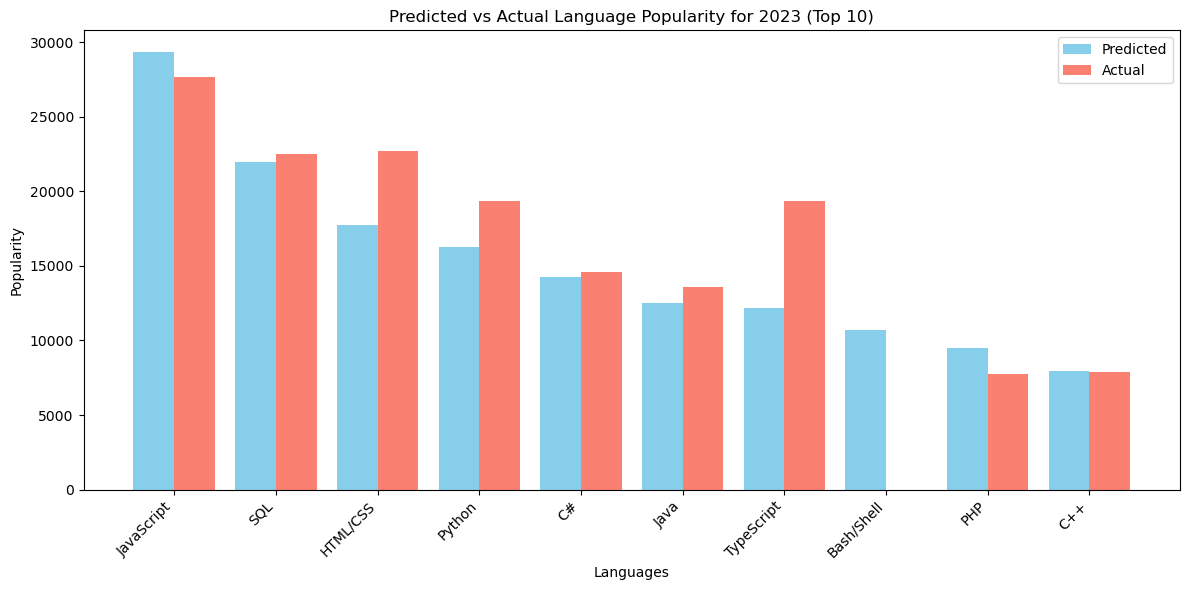

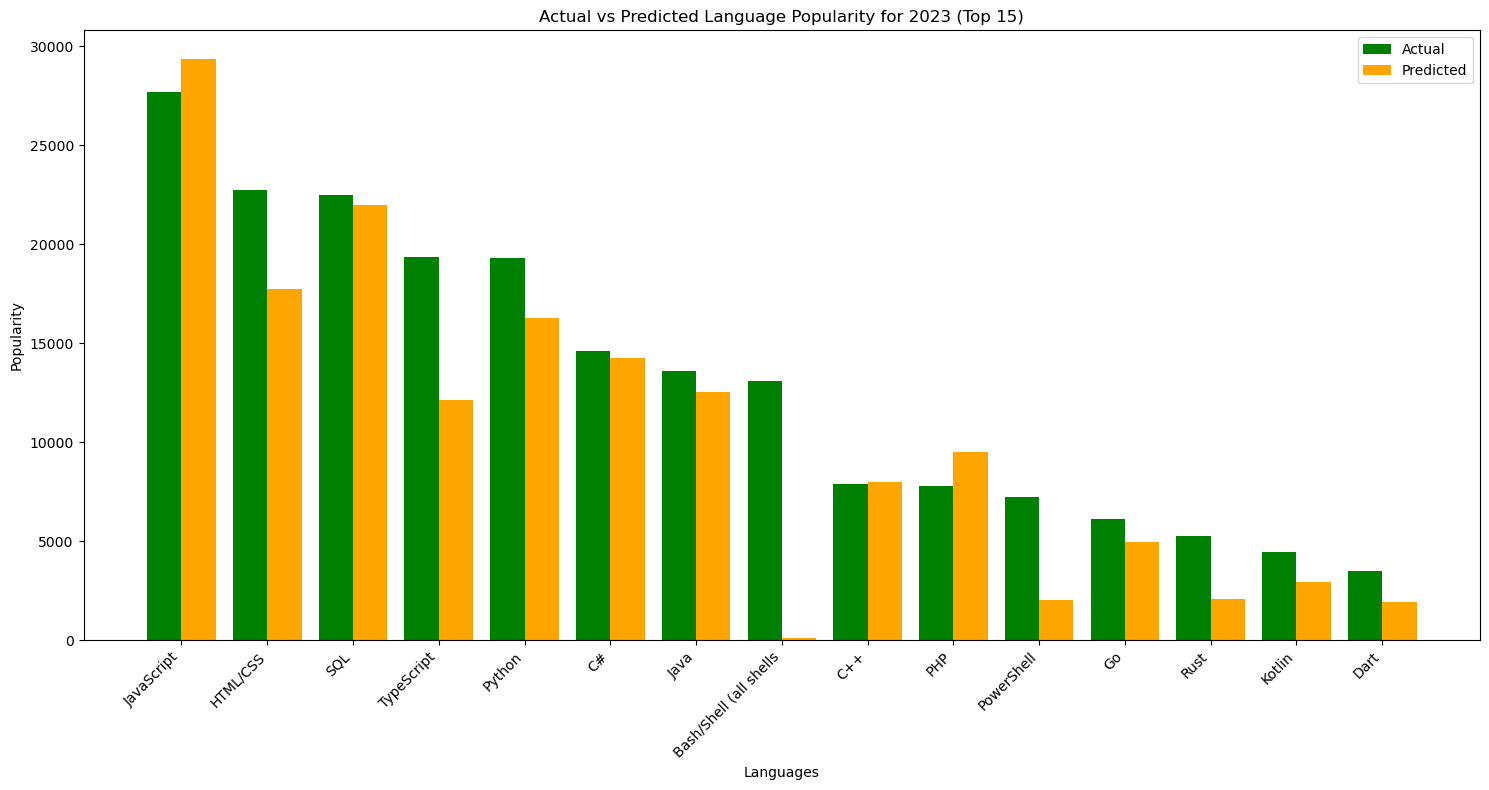

In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tabulate import tabulate

# ----------------------------
# 1. Set Global Random Seeds for Reproducibility
# ----------------------------
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Enable deterministic operations for TensorFlow
try:
    tf.config.experimental.enable_op_determinism()
except AttributeError:
    # If TensorFlow version does not support this method
    print("TensorFlow does not support enable_op_determinism(). Proceeding without it.")

# ----------------------------
# 2. Load and Preprocess the Data
# ----------------------------
# Load the dataset
data = pd.read_csv('all_combined_data_2011_2023.csv')

# Filter for specific language categories
language_types = ['Programming Language', 'Scripting Language', 'Markup Language']
filtered_data = data[data['Category'].isin(language_types)]

# Pivot the data to create a matrix of years and languages
pivot_data = filtered_data.pivot(index='Year', columns='Language', values='Count').fillna(0)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(pivot_data), 
                               columns=pivot_data.columns, 
                               index=pivot_data.index)

# Prepare the data for the neural network
X = normalized_data.iloc[:-1].values  # Data from 2011 to 2022
y = normalized_data.iloc[1:].values   # Data from 2012 to 2023

# Split the data into training and validation sets with a fixed random state
X_train, X_val, y_train, y_val = train_test_split(
    X[:-1], y[:-1], test_size=0.2, random_state=42
)

# ----------------------------
# 3. Create and Compile the Neural Network Model
# ----------------------------
model = tf.keras.Sequential([
    tf.keras.layers.Dense(
        64, activation='relu', input_shape=(X.shape[1],), 
        kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)
    ),
    tf.keras.layers.Dense(
        32, activation='relu', 
        kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)
    ),
    tf.keras.layers.Dense(
        X.shape[1], 
        kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)
    )
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ----------------------------
# 4. Train the Model
# ----------------------------
history = model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=32, 
    validation_data=(X_val, y_val), 
    verbose=0
)

# ----------------------------
# 5. Make Predictions for 2023
# ----------------------------
# Predict the popularity for 2023
prediction_2023 = model.predict(X[-1].reshape(1, -1))

# Denormalize the predictions
prediction_2023_denorm = scaler.inverse_transform(prediction_2023)

# Get actual 2023 data
actual_2023 = pivot_data.iloc[-1].values
predicted_2023 = prediction_2023_denorm[0]

# ----------------------------
# 6. Evaluate the Model
# ----------------------------
# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(actual_2023 - predicted_2023))
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# ----------------------------
# 7. Display Top 10 Predicted vs Actual Languages for 2023
# ----------------------------
# Identify top 10 languages based on predicted popularity
top_10_pred_indices = predicted_2023.argsort()[-10:][::-1]
top_10_pred_languages = pivot_data.columns[top_10_pred_indices]

print("\nTop 10 Predicted vs Actual Languages for 2023:")
for lang in top_10_pred_languages:
    predicted = predicted_2023[pivot_data.columns.get_loc(lang)]
    actual = actual_2023[pivot_data.columns.get_loc(lang)]
    print(f"{lang}: Predicted: {predicted:.2f}, Actual: {actual:.2f}")

# ----------------------------
# 8. Comprehensive Reporting
# ----------------------------
# Prepare data for the table (Top 30 based on actual 2023 data)
table_data = []
top_30_indices = actual_2023.argsort()[-30:][::-1]  # Sort by actual 2023 data
top_30_languages = pivot_data.columns[top_30_indices]

for lang in top_30_languages:
    idx = pivot_data.columns.get_loc(lang)
    actual = actual_2023[idx]
    predicted = predicted_2023[idx]
    difference = actual - predicted
    percentage_error = (difference / actual) * 100 if actual != 0 else float('inf')
    table_data.append([
        lang, 
        f"{actual:.2f}", 
        f"{predicted:.2f}", 
        f"{difference:.2f}", 
        f"{percentage_error:.2f}%"
    ])

# Create and display the table using tabulate
headers = ["Language", "Actual Data 2023", "Predicted Data 2023", "Difference", "% Error"]
print("\nTop 30 Languages: Actual vs Predicted for 2023:")
print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".2f"))

# Calculate and display overall metrics
total_actual = np.sum(actual_2023)
total_predicted = np.sum(predicted_2023)
overall_difference = total_actual - total_predicted
overall_percentage_error = (overall_difference / total_actual) * 100 if total_actual != 0 else float('inf')

print(f"\nOverall Metrics:")
print(f"Total Actual: {total_actual:.2f}")
print(f"Total Predicted: {total_predicted:.2f}")
print(f"Overall Difference: {overall_difference:.2f}")
print(f"Overall Percentage Error: {overall_percentage_error:.2f}%")

# ----------------------------
# 9. Visualizations
# ----------------------------

# 9.1. Visualize the Training History
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# 9.2. Visualize Predicted vs Actual Values for Top 10 Languages
plt.figure(figsize=(12, 6))
x = range(len(top_10_pred_languages))
predicted_values = [predicted_2023[pivot_data.columns.get_loc(lang)] for lang in top_10_pred_languages]
actual_values = [actual_2023[pivot_data.columns.get_loc(lang)] for lang in top_10_pred_languages]

plt.bar(x, predicted_values, width=0.4, align='center', label='Predicted', color='skyblue')
plt.bar([i + 0.4 for i in x], actual_values, width=0.4, align='center', label='Actual', color='salmon')
plt.xlabel('Languages')
plt.ylabel('Popularity')
plt.title('Predicted vs Actual Language Popularity for 2023 (Top 10)')
plt.xticks([i + 0.2 for i in x], top_10_pred_languages, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# 9.3. Visualize the Comparison for Top 15 Languages (Based on Actual Data)
plt.figure(figsize=(15, 8))
top_15_languages = top_30_languages[:15]
x = range(len(top_15_languages))
actual_top_15 = [actual_2023[pivot_data.columns.get_loc(lang)] for lang in top_15_languages]
predicted_top_15 = [predicted_2023[pivot_data.columns.get_loc(lang)] for lang in top_15_languages]

plt.bar(x, actual_top_15, width=0.4, align='center', label='Actual', color='green')
plt.bar([i + 0.4 for i in x], predicted_top_15, width=0.4, align='center', label='Predicted', color='orange')
plt.xlabel('Languages')
plt.ylabel('Popularity')
plt.title('Actual vs Predicted Language Popularity for 2023 (Top 15)')
plt.xticks([i + 0.2 for i in x], top_15_languages, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


## End of the code